Målet mitt er å minimere forventet prediksjonsfeil. Jeg kan dekomponere det for å få litt innsikt. Poeng at vi har data som er generert fra $P$. Bruker utvalg $$\mathcal{D}=\{(\mathbf{x}_n,y_n):n=1,\ldots,N\}$$(treningsdata) til å kjøre en algoritme $\mathcal{A}$ (i praksis: fullt spesifisert tapsfunksjon som vi minimerer) som spytter ut en hypotese funksjon $$h_{\mathcal{D}}=\mathcal{A}(\mathcal{D})$$ som jeg bruker til å predikere fremtidige verdier $$\hat{y}(\mathbf{x})=h_{\mathcal{D}}(\mathbf{x})$$. Jeg vil at funksjon skal være i nærheten av $$\bar{y}(x):=E[y|x]=E_{y|x}[y]=\int_y y P(y|x)dy.$$ 


Jeg begynner med å estimere MSE for gitt $\mathcal{D}$, altså
$$
E_{(x,y)\sim P}[(y-h_{\mathcal{D}}(\mathbf{x}))^2|\mathcal{D}] = \int_{\mathbf{x}}\int_y (y-h_{\mathcal{D}}(\mathbf{x}))^2 P(\mathbf{x},y)d\mathbf{x}dy
$$

In [13]:
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [14]:
def make_obs(N, f=lambda x:x+x**2):
    '''
    Creates sample with quadratic E[y|x]
    
    Returns:
        (x,y): two dimensional arrays
    '''
    x = np.random.uniform(size=N)
    y = f(x)+np.random.randn(N)
    return (x[:,None], y[:,None])

In [15]:
g = lambda x: np.cos(10*x)
N_pop = 10000
N_d = 25

x_pop, y_pop = make_obs(N_pop, g)


steps = [('poly', PolynomialFeatures()),
         ('lin_reg', LinearRegression())]
lin_reg = Pipeline(steps)

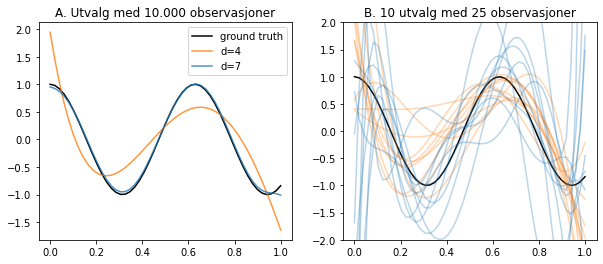

In [32]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes = axes.flatten()
x_grid = np.linspace(0,1)

axes[0].plot(x_grid, g(x_grid), c='black', label='ground truth')
axes[1].plot(x_grid, g(x_grid), c='black', label='ground truth')

degrees = (4,7)

colors = ['tab:orange', 'tab:blue']
for i in range(2):
    lin_reg = lin_reg.set_params(poly__degree=degrees[i])
    y_pred = lin_reg.fit(x_pop,y_pop).predict(x_grid[:,None])
    axes[0].plot(x_grid, y_pred, label=f'd={degrees[i]}', c=colors[i], alpha=.8)
    for _ in range(10):
        x_d, y_d = make_obs(N_d, g)
        y_pred = lin_reg.fit(x_d,y_d).predict(x_grid[:,None])
        axes[1].plot(x_grid, y_pred, c=colors[i], alpha=0.3)
        
axes[0].legend()
axes[0].title.set_text('A. Utvalg med 10.000 observasjoner')
axes[1].set_ylim(-2.,2)
axes[1].title.set_text('B. 10 utvalg med 25 observasjoner')
fig.savefig('bias_var_0.pdf')